In [ ]:
from google.colab import drive
drive.mount("content")

Mounted at content


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import *
from keras.models import *
from keras.utils import *
from sklearn.preprocessing import *

In [ ]:
train=pd.read_csv("/content/content/MyDrive/data_band/total_train.csv",header=None)
test=pd.read_csv("/content/content/MyDrive/data_band/total_test.csv",header=None)
vali=pd.read_csv("/content/content/MyDrive/data_band/total_validation.csv",header=None)

In [ ]:
train.shape

(24000, 256)

In [ ]:
arr = np.array([]) # arr안에 번호가 사람 번호

for i in range(1,101):
  for j in range(240):
    arr = np.append(arr, np.array([i]))

train[256]=arr

In [ ]:
train

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.031820,-0.015874,-0.001172,0.011249,0.020713,0.026974,0.030190,0.030831,0.029559,0.027102,...,-0.035003,-0.034647,-0.033418,-0.031305,-0.028545,-0.025565,-0.022868,-0.020891,-0.019891,1.0
1,-0.019872,-0.020594,-0.021637,-0.022515,-0.022798,-0.022202,-0.020644,-0.018236,-0.015233,-0.011971,...,-0.072854,-0.070401,-0.067539,-0.064716,-0.062285,-0.060443,-0.059208,-0.058448,-0.057940,1.0
2,-0.057454,-0.056822,-0.055984,-0.054985,-0.053945,-0.052999,-0.052250,-0.051733,-0.051414,-0.051213,...,-0.059447,-0.057278,-0.056011,-0.055424,-0.055246,-0.055239,-0.055275,-0.055352,-0.055577,1.0
3,-0.056099,-0.057035,-0.058395,-0.060043,-0.061694,-0.062967,-0.063465,-0.062887,-0.061116,-0.058272,...,-0.071806,-0.071741,-0.071302,-0.070367,-0.068861,-0.066758,-0.064085,-0.060936,-0.057487,1.0
4,0.053295,0.053439,0.055066,0.059409,0.067278,0.078961,0.094216,0.112361,0.132422,0.153321,...,0.150072,0.164082,0.180535,0.199168,0.219491,0.240843,0.262473,0.283635,0.303673,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.043512,0.020932,0.001382,-0.014947,-0.027957,-0.037670,-0.044270,-0.048123,-0.049775,-0.049906,...,-0.020100,-0.018824,-0.018132,-0.018247,-0.019303,-0.021303,-0.024082,-0.027314,-0.030559,100.0
23996,-0.076867,-0.083002,-0.088128,-0.091454,-0.092582,-0.091623,-0.089189,-0.086281,-0.084051,-0.083490,...,-0.019352,-0.019054,-0.016308,-0.011295,-0.004783,0.002224,0.008807,0.014368,0.018726,100.0
23997,0.022090,0.024929,0.027786,0.031100,0.035075,0.039622,0.044402,0.048933,0.052740,0.055510,...,-0.053679,-0.057318,-0.059515,-0.061043,-0.062554,-0.064528,-0.067243,-0.070758,-0.074902,100.0
23998,-0.079288,-0.083358,-0.086464,-0.087995,-0.087513,-0.084880,-0.080336,-0.074488,-0.068211,-0.062467,...,-0.066882,-0.067113,-0.068424,-0.070704,-0.073600,-0.076563,-0.078930,-0.080050,-0.079413,100.0


In [ ]:
arr_t = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_t = np.append(arr_t, np.array([i]))

arr_v = np.array([])

for i in range(1,101):
  for j in range(60):
    arr_v = np.append(arr_v, np.array([i]))

test[256]=arr_t
vali[256]=arr_v
vali

,0,1,2,3,4,5,6,7,8,9,...,247,248,249,250,251,252,253,254,255,256
0,-0.054004,-0.050825,-0.048322,-0.046824,-0.046532,-0.047445,-0.049330,-0.051735,-0.054058,-0.055645,...,-0.028530,-0.029492,-0.029945,-0.029648,-0.028487,-0.026485,-0.023782,-0.020603,-0.017228,1.0
1,-0.209505,-0.208403,-0.206688,-0.204586,-0.202338,-0.200196,-0.198379,-0.197017,-0.196097,-0.195447,...,-0.205948,-0.202740,-0.198907,-0.194673,-0.190228,-0.185713,-0.181227,-0.176850,-0.172660,1.0
2,-0.067735,-0.065806,-0.063513,-0.060990,-0.058453,-0.056174,-0.054439,-0.053477,-0.053402,-0.054158,...,-0.093394,-0.093535,-0.092581,-0.090373,-0.086983,-0.082689,-0.077914,-0.073148,-0.068878,1.0
3,-0.002916,-0.007004,-0.012949,-0.020332,-0.028344,-0.035829,-0.041422,-0.043775,-0.041865,-0.035337,...,-0.097242,-0.124400,-0.137850,-0.128147,-0.087559,-0.012153,0.096530,0.230711,0.376848,1.0
4,-0.028844,-0.028027,-0.028309,-0.029364,-0.030767,-0.032072,-0.032878,-0.032899,-0.032005,-0.030247,...,-0.074225,-0.075851,-0.077197,-0.077950,-0.077920,-0.077074,-0.075531,-0.073514,-0.071283,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0.015685,0.016545,0.014765,0.010665,0.004884,-0.001771,-0.008494,-0.014652,-0.019878,-0.024092,...,-0.052522,-0.020671,0.001335,0.013226,0.016606,0.014270,0.009428,0.004988,0.003041,100.0
5996,-0.171624,-0.175496,-0.177258,-0.176626,-0.173694,-0.168915,-0.163017,-0.156862,-0.151287,-0.146943,...,0.013368,0.016800,0.019352,0.020889,0.021392,0.020985,0.019940,0.018650,0.017569,100.0
5997,0.000168,-0.001110,-0.003542,-0.006028,-0.007548,-0.007396,-0.005302,-0.001433,0.003712,0.009473,...,-0.072272,-0.071268,-0.070220,-0.069094,-0.067885,-0.066618,-0.065335,-0.064074,-0.062856,100.0
5998,-0.033347,-0.035287,-0.036169,-0.036014,-0.035070,-0.033744,-0.032503,-0.031760,-0.031802,-0.032746,...,-0.036757,-0.033683,-0.032034,-0.031757,-0.032584,-0.034107,-0.035874,-0.037486,-0.038665,100.0


In [ ]:
arr

array([  1.,   1.,   1., ..., 100., 100., 100.])

In [ ]:
y_train = to_categorical(train[256])
y_test = to_categorical(test[256])
y_val = to_categorical(vali[256])
y_train[:241]

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
train.drop([256], axis=1, inplace=True)
test.drop([256], axis=1, inplace=True)
vali.drop([256], axis=1, inplace=True)
train

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-0.031820,-0.015874,-0.001172,0.011249,0.020713,0.026974,0.030190,0.030831,0.029559,0.027102,...,-0.034745,-0.035003,-0.034647,-0.033418,-0.031305,-0.028545,-0.025565,-0.022868,-0.020891,-0.019891
1,-0.019872,-0.020594,-0.021637,-0.022515,-0.022798,-0.022202,-0.020644,-0.018236,-0.015233,-0.011971,...,-0.074461,-0.072854,-0.070401,-0.067539,-0.064716,-0.062285,-0.060443,-0.059208,-0.058448,-0.057940
2,-0.057454,-0.056822,-0.055984,-0.054985,-0.053945,-0.052999,-0.052250,-0.051733,-0.051414,-0.051213,...,-0.062595,-0.059447,-0.057278,-0.056011,-0.055424,-0.055246,-0.055239,-0.055275,-0.055352,-0.055577
3,-0.056099,-0.057035,-0.058395,-0.060043,-0.061694,-0.062967,-0.063465,-0.062887,-0.061116,-0.058272,...,-0.071648,-0.071806,-0.071741,-0.071302,-0.070367,-0.068861,-0.066758,-0.064085,-0.060936,-0.057487
4,0.053295,0.053439,0.055066,0.059409,0.067278,0.078961,0.094216,0.112361,0.132422,0.153321,...,0.138507,0.150072,0.164082,0.180535,0.199168,0.219491,0.240843,0.262473,0.283635,0.303673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,0.043512,0.020932,0.001382,-0.014947,-0.027957,-0.037670,-0.044270,-0.048123,-0.049775,-0.049906,...,-0.021698,-0.020100,-0.018824,-0.018132,-0.018247,-0.019303,-0.021303,-0.024082,-0.027314,-0.030559
23996,-0.076867,-0.083002,-0.088128,-0.091454,-0.092582,-0.091623,-0.089189,-0.086281,-0.084051,-0.083490,...,-0.017889,-0.019352,-0.019054,-0.016308,-0.011295,-0.004783,0.002224,0.008807,0.014368,0.018726
23997,0.022090,0.024929,0.027786,0.031100,0.035075,0.039622,0.044402,0.048933,0.052740,0.055510,...,-0.047767,-0.053679,-0.057318,-0.059515,-0.061043,-0.062554,-0.064528,-0.067243,-0.070758,-0.074902
23998,-0.079288,-0.083358,-0.086464,-0.087995,-0.087513,-0.084880,-0.080336,-0.074488,-0.068211,-0.062467,...,-0.067610,-0.066882,-0.067113,-0.068424,-0.070704,-0.073600,-0.076563,-0.078930,-0.080050,-0.079413


In [ ]:
X_train=train.values
X_test=test.values
X_val=vali.values

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(y_val.shape)

(24000, 256)
(6000, 256)
(6000, 256)
(24000, 101)
(6000, 101)
(6000, 101)


In [ ]:
# X_train = X_train.reshape(1, 256, 24000)
# X_test = X_test.reshape(1, 256, 6000)
# X_val = X_val.reshape(1, 256, 6000)
X_train = X_train.reshape(24000, 256, 1)
X_test = X_test.reshape(6000, 256, 1)
X_val = X_val.reshape(6000, 256, 1)
X_train.shape, X_test.shape, X_val.shape

((24000, 256, 1), (6000, 256, 1), (6000, 256, 1))

In [ ]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(256,1))) #shape[1]=열
model.add(LSTM(units=100, return_sequences=True))
model.add(LSTM(units=50, return_sequences=True))

model.add(Flatten())
model.add(Dropout(0.1))

model.add(Dense(101, activation='softmax'))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256, 100)          40800     
                                                                 
 lstm_1 (LSTM)               (None, 256, 100)          80400     
                                                                 
 lstm_2 (LSTM)               (None, 256, 50)           30200     
                                                                 
 flatten (Flatten)           (None, 12800)             0         
                                                                 
 dropout (Dropout)           (None, 12800)             0         
                                                                 
 dense (Dense)               (None, 101)               1292901   
                                                                 
Total params: 1,444,301
Trainable params: 1,444,301
Non-

In [ ]:
print(X_train.shape)
history = model.fit(X_train, y_train, batch_size = 1024, epochs = 500, verbose = 1, validation_data=(X_val, y_val))

(24000, 256, 1)
Epoch 1/500
24/24 [==============================] - 9s 219ms/step - loss: 0.0098 - accuracy: 0.0100 - val_loss: 0.0098 - val_accuracy: 0.0088
Epoch 2/500
24/24 [==============================] - 4s 177ms/step - loss: 0.0098 - accuracy: 0.0087 - val_loss: 0.0098 - val_accuracy: 0.0108
Epoch 3/500
24/24 [==============================] - 4s 178ms/step - loss: 0.0098 - accuracy: 0.0089 - val_loss: 0.0098 - val_accuracy: 0.0105
Epoch 4/500
24/24 [==============================] - 4s 179ms/step - loss: 0.0098 - accuracy: 0.0102 - val_loss: 0.0098 - val_accuracy: 0.0103
Epoch 5/500
24/24 [==============================] - 4s 179ms/step - loss: 0.0098 - accuracy: 0.0095 - val_loss: 0.0098 - val_accuracy: 0.0088
Epoch 6/500
24/24 [==============================] - 4s 180ms/step - loss: 0.0098 - accuracy: 0.0088 - val_loss: 0.0098 - val_accuracy: 0.0078
Epoch 7/500
24/24 [==============================] - 4s 182ms/step - loss: 0.0098 - accuracy: 0.0095 - val_loss: 0.0098 - val_

In [ ]:
model.save('SupervisedLstm.h5')
new_model = tf.keras.models.load_model('SupervisedLstm.h5')

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


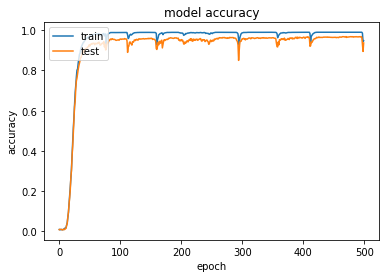

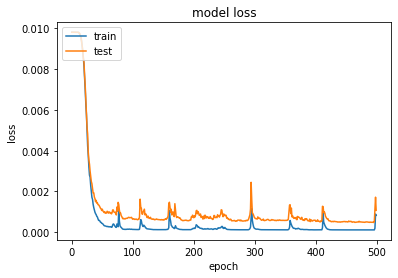

In [ ]:
results=history
# list all data in history
print(results.history.keys())
# summarize history for accuracy
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
 
